<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
# Portfolio Assignment 1: Visualisation for Network Traffic Analysis (2022)
---

The completion of this worksheet is worth a **maximum of 20 marks** towards your portfolio assignment for the UFCFEL-15-3 Security Data Analytics and Visualisation (SDAV) module.

### Brief
---

You have been asked to examine a sample of network traffic to investigate suspicious activity on some of the company workstations. The company directors need to be able to understand this data. Your task is to **produce a series of different visual representations to describe and understand the characteristics of the data, based on the task questions below**. You should use the [Matplotlib documentation](https://matplotlib.org/stable/api/index.html) and the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) to learn about the library functionality, as well as other online resources. 

### Assessment and Marking
---

For each question you will see the maximum number of marks you may be awarded for a complete answer in brackets.

* **Task 1:** Plot a Line Chart that shows "Minutes" on the x-axis, and "Total Number of Packets" sent on the y-axis. (3)
* **Task 2:** Plot a Line Chart that shows "Minutes" on the x-axis, and "Total Packet Length" sent on the y-axis. (3)
* **Task 3:** Display a Bar Chart that shows "Protocol" on the x-axis, and "Count" on the y-axis. (2)
* **Task 4:** Display a Scatter Chart that shows the association between Source and Destination data. (2)
* **Task 5:** Filter the data so that only 10.x.x.x Source addresses are included in a new DataFrame. (1)
* **(Advanced) Task 6:** Display a Node Link Diagram for this new DataFrame. (3)
* **(Advanced) Task 7:** For each Protocol type, create a new Column and assign whether the Protocol usage is True or False. (3)
* **(Advanced) Task 8:** Show a Multi-Line Chart that shows the Total Packet Length Per Protocol. (3)

Your submission should be submitted to GitLab so that the notebook is fully rendered and executed.
 
### Contact
---

Questions about this assignment should be directed to your module leader (Phil.Legg@uwe.ac.uk). You can use the Blackboard Q&A feature to ask questions related to this module and this assignment, as well as the on-site teaching sessions.

---

In [1]:
### Load in the libraries and the data
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import numpy as np

# The following line is useful before each plot to increase the default size that it is rendered at:
# plt.figure(figsize=(20,10))

data = pd.read_csv('./T1_data/2022-task1_data.csv')
data = data.dropna()
data

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,10.10.5.11,10.10.5.10,TCP,5108,"49205 > 1291 [PSH, ACK] Seq=1 Ack=1 Win=256 ..."
1,2,0.000050,10.10.5.10,10.10.5.11,TCP,54,1291 > 49205 [ACK] Seq=1 Ack=5055 Win=501 Len=0
2,3,0.000240,10.10.5.10,10.10.5.11,TCP,69,"1291 > 49205 [PSH, ACK] Seq=1 Ack=5055 Win=5..."
3,4,0.186710,10.10.5.11,10.10.5.10,TCP,60,49205 > 1291 [ACK] Seq=5055 Ack=16 Win=256 L...
4,5,1.119689,10.10.5.14,10.10.5.10,TCP,4697,"49195 > 1294 [PSH, ACK] Seq=1 Ack=1 Win=256 ..."
...,...,...,...,...,...,...,...
34465,34466,819.314740,PcsCompu_03:cb:a5,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.12
34466,34467,820.066244,PcsCompu_60:73:28,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.11
34467,34468,820.146617,PcsCompu_90:18:5a,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.14
34468,34469,820.224071,PcsCompu_c8:46:cd,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.13


### Task 1: Plot a Line Chart that shows "Minutes" on the x-axis, and "Total Number of Packets" sent on the y-axis. (3)

*Hint: The Time column could be grouped by minute by changing the precision of how time is measured.*

        No.  Source  Destination  Protocol  Length   Info
Time                                                     
0        80      80           80        80      80     80
1        76      76           76        76      76     76
2       107     107          107       107     107    107
3       555     555          555       555     555    555
4       179     179          179       179     179    179
5       101     101          101       101     101    101
6        74      74           74        74      74     74
7       161     161          161       161     161    161
8      1988    1988         1988      1988    1988   1988
9      6323    6323         6323      6323    6323   6323
10    23090   23090        23090     23090   23090  23090
11     1169    1169         1169      1169    1169   1169
12      344     344          344       344     344    344
13      223     223          223       223     223    223


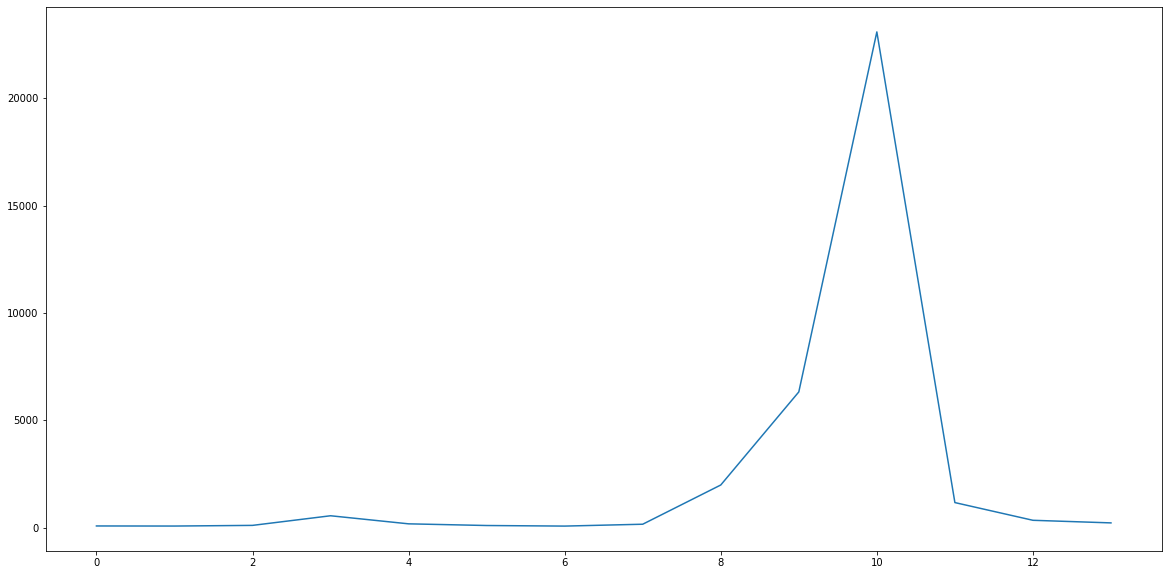

In [2]:
# ANSWER

TimeInMins = data.copy() # Creates a copy of the data to stop any data corruption
TimeInMins['Time'] = TimeInMins['Time']/60 # Converts the time to minutes
TimeInMins['Time'] = TimeInMins['Time'].astype(int) # Converts the time to an integer
# TimeInMins['Time'] = TimeInMins['Time'].round() # Rounds the time to the nearest minute

# Group by time and counts the number of packets in each time interval
TimeInMins = TimeInMins.groupby(['Time']).count()
print(TimeInMins)

# Plots the data
plt.figure(figsize=(20,10))
plt.plot(TimeInMins.index.values.tolist(), TimeInMins['No.'])
plt.show()


The graph above shows that there was a spike in traffic between the 8 and 12 minute mark. This could show that there was an attack on the network 

### Task 2: Plot a Line Chart that shows "Minutes" on the x-axis, and "Total Packet Length" sent on the y-axis. (3)

*Hint: Group you data by "Time" and then you can take the sum of the Length column.*

            No.    Length
Time                     
0          3240     79140
1          9006     77115
2         22470     79660
3        300255    303787
4        162532    166137
5        105848     89460
6         84027     76533
7        201733     83115
8       4627070    495799
9      40992009   6511855
10    489265555  28984464
11     38949911    436475
12     11721972    158303
13      7662057    102979


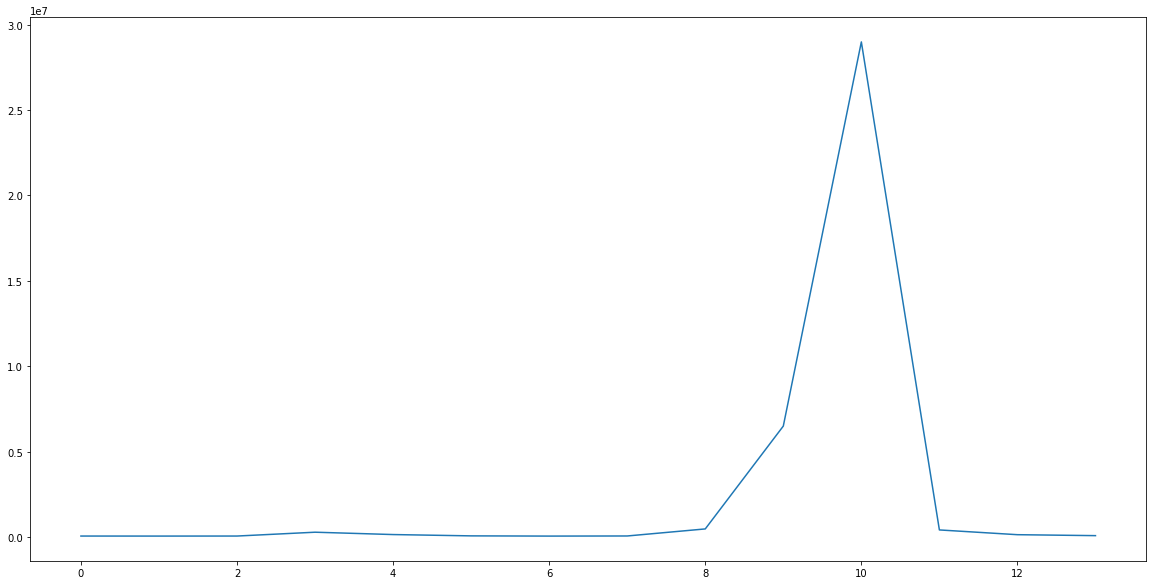

In [3]:
# ANSWER
# First I changed the the time into minutes and rounded them down to the closest minute
Task2Data = data.copy()
Task2Data['Time'] = Task2Data['Time']/60
Task2Data['Time'] = Task2Data['Time'].astype(int)
# Task2Data['Time'] = Task2Data['Time'].round()


# I then group the data by the time and sum the length of the packets
Task2Data = Task2Data.groupby(['Time']).sum()
print(Task2Data)

# totals = []
# totalLength = 0
# for index, row in Task2Data.iterrows():
#     totalLength += row['Length']
#     totals.append(totalLength)

# plt.figure(figsize=(20,10))
# plt.plot(Task2Data.index.values.tolist(), totals)
# plt.show()

# I then plot the data to a graph
plt.figure(figsize=(20,10))
plt.plot(Task2Data.index.values.tolist(), Task2Data['Length'])
plt.show()


The graph above shows that there was a spike in traffic between the 8 and 12 minute mark. This could show that there was an attack on the network or that a very large download took place between this time period over multiple machines

### Task 3: Display a Bar Chart that shows "Protocol" on the x-axis, and "Count" on the y-axis. (2)

*Hint: Search the pandas documentation for creating a Bar Chart from a DataFrame column.*

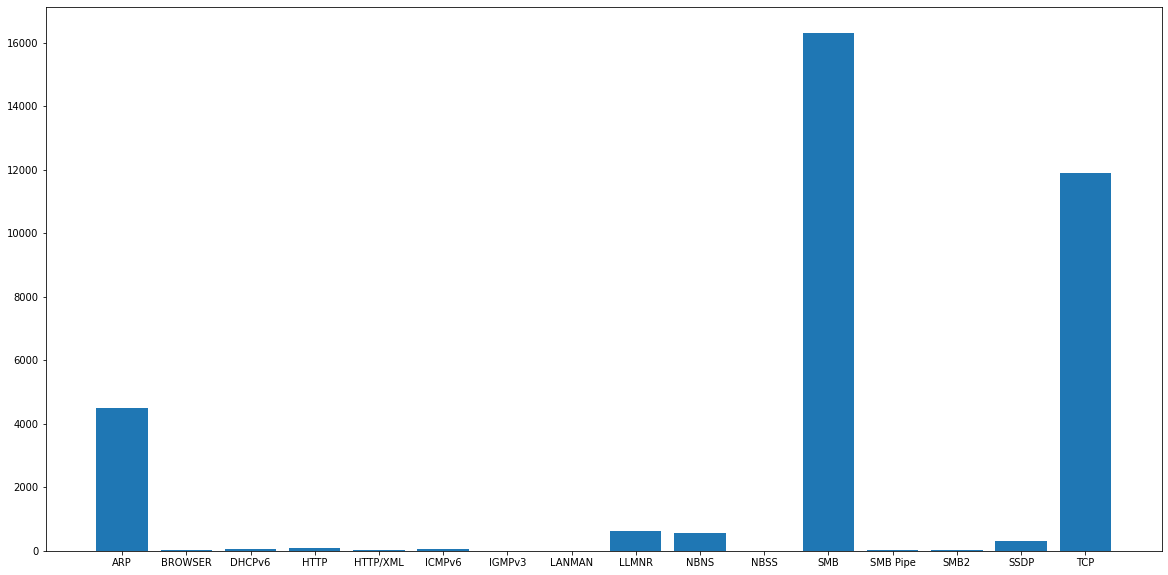

In [4]:
# ANSWER
# I created a copy of the data to stop any data corruption and then grouped by the protoc
bar_data = data.copy()
bar_data = bar_data.groupby('Protocol').count()
# print(bar_data)

# Plottiing the bar chart
plt.figure(figsize=(20,10))
plt.bar(bar_data.index, bar_data['No.'])
plt.show()

The graph above shows that the top 3 types of protocols are SMB, TCP and ARP.

- Server Message Block (SMB) is a protocol that allows users to access files and printers accross a network
- Transmission Control Protocol (TCP) is a protocol that ensures that there is a secure connection between the server and the client
- Address Resolution Protocol (ARP) is used for mapping the MAC addresses to IP addresses for hosts on the network.

This graoh shows that there are large amounts of files being accessed over the network

### Task 4: Display a Scatter Chart that shows the association between Source and Destination data. (2)

*Hint: Matplotlib has a scatterplot function that takes ***x*** and ***y*** as inputs*

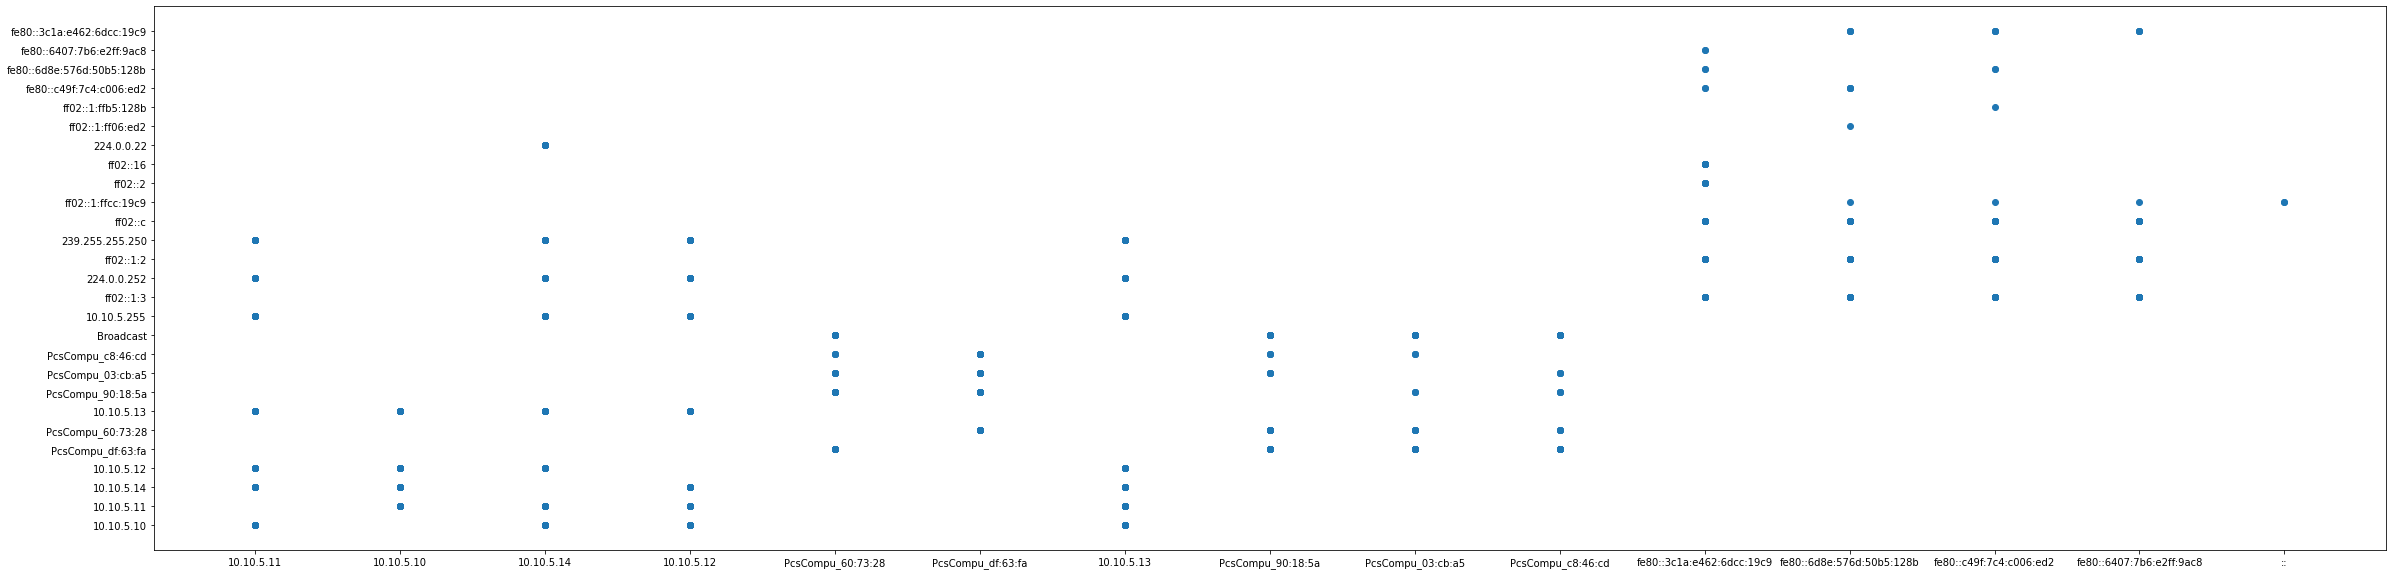

In [5]:
### ANSWER
# I created a copy of the data to stop any data corruption and then plotted a graph using the source and destination columns
scatter_data = data.copy()
plt.figure(figsize=(40,10))
plt.scatter(scatter_data['Source'], scatter_data['Destination'])
plt.show()

The graph above shows the correlation between the source and destination of the traffic. The more dots that the souce destination has shows the higher amount of nodes it interacts with

### Task 5: Filter the data so that only 10.x.x.x Source addresses are included in a new DataFrame. (1)

*Hint: Retrieve all rows where the Source string starts with 10.*

In [6]:
# ANSWER
# I used the build in function from pandas called startswith to filter the data and only show results where the source starts with 10.
filtered_data = data[data['Source'].str.startswith('10.')]
print(filtered_data)

         No.        Time      Source Destination Protocol  Length  \
0          1    0.000000  10.10.5.11  10.10.5.10      TCP    5108   
1          2    0.000050  10.10.5.10  10.10.5.11      TCP      54   
2          3    0.000240  10.10.5.10  10.10.5.11      TCP      69   
3          4    0.186710  10.10.5.11  10.10.5.10      TCP      60   
4          5    1.119689  10.10.5.14  10.10.5.10      TCP    4697   
...      ...         ...         ...         ...      ...     ...   
34455  34456  818.104499  10.10.5.13  10.10.5.10      TCP    8214   
34456  34457  818.104531  10.10.5.10  10.10.5.13      TCP      54   
34457  34458  818.104875  10.10.5.10  10.10.5.13      TCP      69   
34460  34461  818.294131  10.10.5.13  10.10.5.10      TCP      60   
34461  34462  818.313646  10.10.5.12  10.10.5.13      TCP      60   

                                                    Info  
0      49205  >  1291 [PSH, ACK] Seq=1 Ack=1 Win=256 ...  
1      1291  >  49205 [ACK] Seq=1 Ack=5055 Win=501 Le

### (Advanced) Task 6: Display a Node Link Diagram for this new DataFrame. (3)

*Hint: Look at the NetworkX library: https://networkx.org/ and the online course notes.*

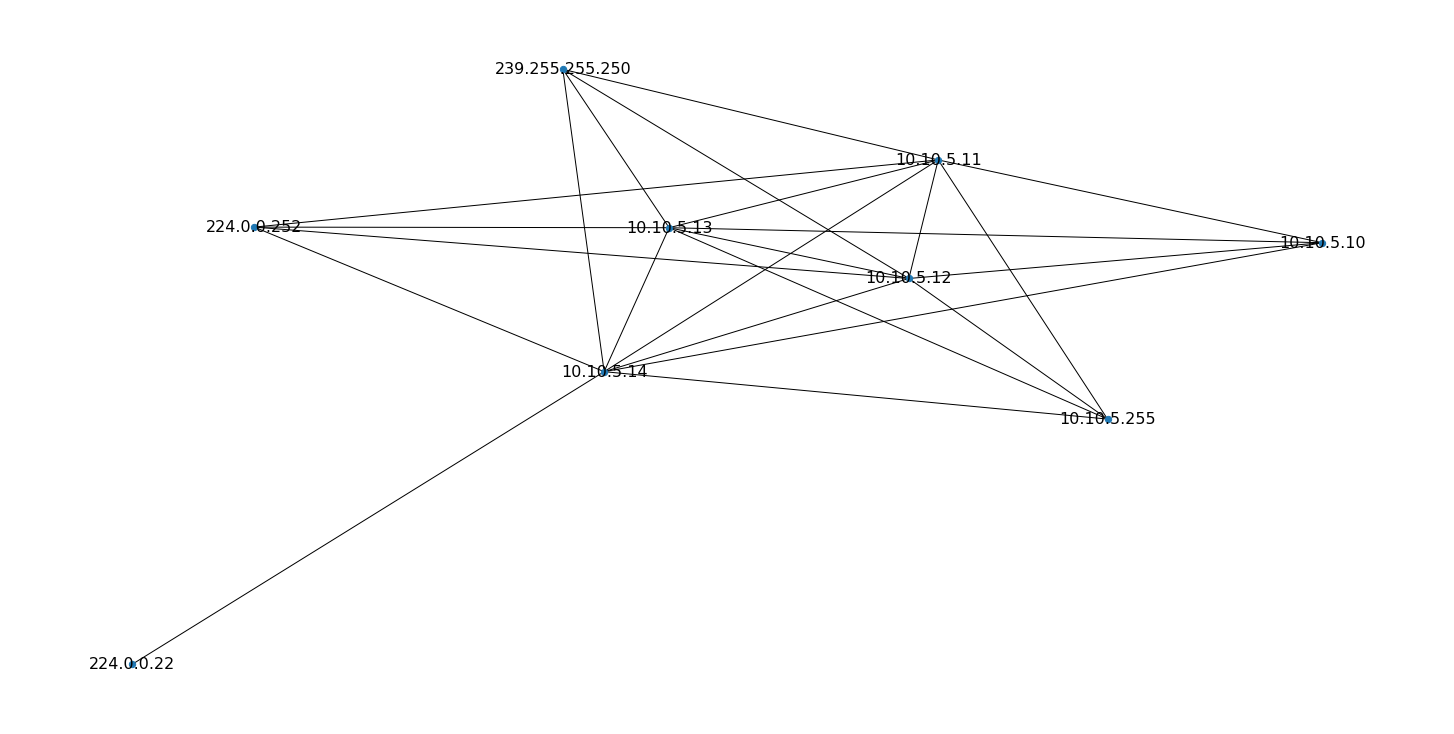

In [7]:
# ANSWER
# I plotted each node and edge using the filtered data from the previous task 
G = nx.Graph([(row['Source'], row['Destination']) for index, row in filtered_data.iterrows()])
plt.figure(figsize=(20,10))
nx.draw(G, with_labels=True, node_size=40, font_size=16)

The graph above shows the nodes that start with "10." and their connections to other nodes. This is there are nodes plotted on the graph that do not start with "10."

### (Advanced) Task 7: For each Protocol type, create a new Column and assign whether the Protocol usage is True or False (3)

*Hint: Get a list of unique protocol values, assign each value to be a new column where the Protocol column is equal to the Protocol name.*



In [8]:
# ANSWER 
# I created a copy of the data to stop any data corruption 
dtNewColumns = data.copy()
# I then created a list of all the unique protocols to use to create the new columns
protocols = dtNewColumns['Protocol'].unique()

# I then loop through each protocol in that list of protocols 
for protocol in protocols:
    # I then create a new column for each protocol and set the value to true if the protocol matches the current protocol in the loop
    dtNewColumns[protocol] = dtNewColumns['Protocol'].apply(lambda x: True if x == protocol else False)

dtNewColumns

,No.,Time,Source,Destination,Protocol,Length,Info,TCP,ARP,NBNS,...,HTTP,HTTP/XML,BROWSER,SMB,SMB Pipe,NBSS,ICMPv6,IGMPv3,SMB2,LANMAN
0,1,0.000000,10.10.5.11,10.10.5.10,TCP,5108,"49205 > 1291 [PSH, ACK] Seq=1 Ack=1 Win=256 ...",True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,0.000050,10.10.5.10,10.10.5.11,TCP,54,1291 > 49205 [ACK] Seq=1 Ack=5055 Win=501 Len=0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,0.000240,10.10.5.10,10.10.5.11,TCP,69,"1291 > 49205 [PSH, ACK] Seq=1 Ack=5055 Win=5...",True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,0.186710,10.10.5.11,10.10.5.10,TCP,60,49205 > 1291 [ACK] Seq=5055 Ack=16 Win=256 L...,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,1.119689,10.10.5.14,10.10.5.10,TCP,4697,"49195 > 1294 [PSH, ACK] Seq=1 Ack=1 Win=256 ...",True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34465,34466,819.314740,PcsCompu_03:cb:a5,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.12,False,True,False,...,False,False,False,False,False,False,False,False,False,False
34466,34467,820.066244,PcsCompu_60:73:28,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.11,False,True,False,...,False,False,False,False,False,False,False,False,False,False
34467,34468,820.146617,PcsCompu_90:18:5a,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.14,False,True,False,...,False,False,False,False,False,False,False,False,False,False
34468,34469,820.224071,PcsCompu_c8:46:cd,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.13,False,True,False,...,False,False,False,False,False,False,False,False,False,False


### (Advanced) Task 8: Show a Multi-Line Chart that shows the Total Packet Length Per Protocol. (3)

*Hint: Think about how you did this in Task 1 and Task 2, and recall that plt.plot can be used to append to a plot.*

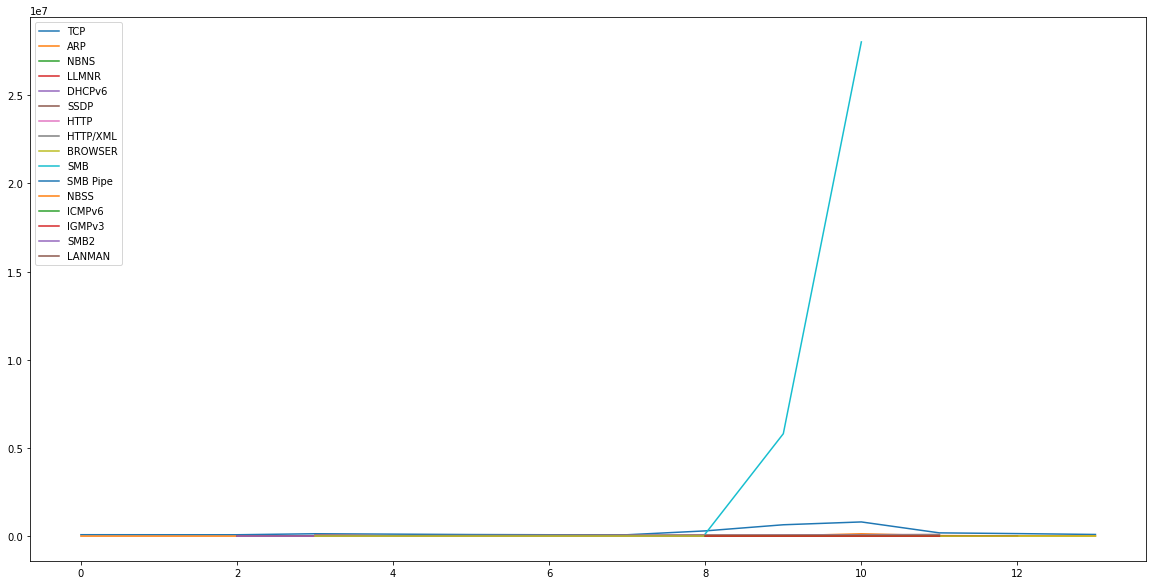

In [9]:
# ANSWER
pd.options.mode.chained_assignment = None  # default='warn'

task8 = data.copy()
# Get unique protocols
protocols = task8['Protocol'].unique()
protocolData = []

for protocol in protocols:
    protocolData.append(task8[task8['Protocol'] == protocol])

def makeMin(x):
    return np.floor(x/60)

for i in range(len(protocols)):
    protocolData[i]['Time'] = protocolData[i]['Time'].apply(makeMin)
    protocolData[i] = protocolData[i].groupby(['Time']).sum()
    
plt.figure(figsize=(20,10))
for index, protocol in enumerate(protocolData):
    plt.plot(protocol.index.values.tolist(), protocol['Length'], label=protocols[index])

plt.legend(loc="upper left")
plt.show()



The graph above shows the length of packets for each protocol against the time. As you can see that there is a high spike in SMB packets around the 9-10 mark 